In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train_val = pd.read_csv("train_data.csv",header=None)
df_train_label = pd.read_csv("train_labels.csv",header=None,names=["label"])
print(df_train_val.shape)
df_train_label['label'].value_counts()


(4363, 264)


1     2178
2      618
3      326
6      260
4      253
5      214
8      195
7      141
9       92
10      86
Name: label, dtype: int64

In [3]:
rythm = list(range(24*7))
chroma = list(range(len(rythm),len(rythm)+12*4))
mfcc = list(range(len(chroma)+len(rythm),len(chroma)+len(rythm)+12*4))

mfcc_means = df_train_val[:][mfcc[:12]].values
mfcc_std = df_train_val[:][mfcc[12:24]].values

## Some magical visualizations 

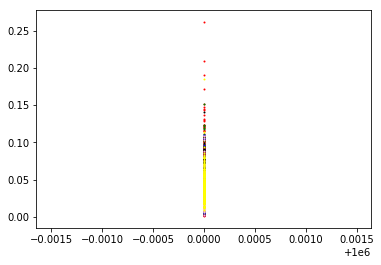

In [4]:
import numpy as np
colors = ['red','green','blue','black','pink','yellow']
for i in range(6):
    loc = np.argwhere(df_train_label.values == i+1)
    plt.scatter(mfcc_means[loc,0],mfcc_std[loc,0],1,color=colors[i])
plt.show()

## Cleaning the messed up MFCC coefficients 

In [5]:
remove = np.array([0,1,2,3])
remove = np.array([remove+i*12 for i in range(4)])
remove = remove.flatten()
tmp=np.array(mfcc)[remove]
df_train_clean = df_train_val.drop(tmp,axis=1)
df_train_clean

,0,1,2,3,4,5,6,7,8,9,...,250,251,256,257,258,259,260,261,262,263
0,1040.70,2315.60,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.30,1706.70,...,-0.055849,-0.052800,0.093584,0.166870,0.083426,0.118090,0.089792,0.074371,0.073162,0.059463
1,2309.40,4780.40,4055.7,3120.5,1979.9,2343.6,2634.2,3208.5,3078.00,3374.70,...,-0.076446,-0.044675,0.102560,0.213040,0.082041,0.080967,0.076450,0.052523,0.052357,0.055297
2,2331.90,4607.00,4732.3,5007.0,3164.9,3171.9,2915.7,3282.3,2400.00,1895.20,...,-0.066073,-0.058104,0.114200,0.223780,0.100770,0.186910,0.067270,0.061138,0.085509,0.049422
3,3350.90,6274.40,5037.0,4609.7,3438.8,3925.8,3746.4,3539.4,3053.70,3075.40,...,-0.114900,-0.051899,0.074124,0.201580,0.049032,0.130210,0.045800,0.080885,0.148910,0.042027
4,2017.60,3351.80,2924.9,2726.3,1979.9,1930.9,2083.4,1889.2,1695.40,1911.70,...,-0.048651,-0.072050,0.079402,0.063495,0.053717,0.086750,0.062090,0.048999,0.033159,0.070813
5,1229.80,3005.80,2818.4,2640.1,2329.1,2568.4,2772.1,3119.3,2505.80,2085.00,...,-0.031886,-0.062968,0.078278,0.058903,0.051245,0.049138,0.070669,0.067383,0.053383,0.037763
6,3936.10,6276.30,4768.8,4157.2,3658.2,3830.3,4421.3,3712.8,3419.90,3437.60,...,-0.084218,-0.040411,0.033861,0.033922,0.072498,0.153120,0.042135,0.104470,0.040248,0.028059
7,556.39,1739.00,2072.0,2713.0,1828.7,2875.6,1739.8,1430.2,1531.40,785.59,...,-0.068315,-0.041432,0.119490,0.164570,0.041037,0.118390,0.076247,0.079585,0.051912,0.094960
8,2764.70,4442.60,3930.6,3504.1,2421.8,3012.6,3154.7,2665.7,2846.50,2595.20,...,-0.121850,-0.063557,0.039843,0.085944,0.062147,0.128530,0.070850,0.054834,0.127700,0.057441
9,3084.70,5645.90,5000.2,4001.9,2761.3,2946.5,2998.7,3141.1,3211.80,3374.60,...,-0.081764,-0.024521,0.018940,0.230170,0.069801,0.041104,0.038691,0.078276,0.074719,0.059803


## Normalizing the data using sklearn pre-processing

In [1]:
from sklearn import preprocessing

x = df_train_clean.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_train_norm = pd.DataFrame(x_scaled)

df_train_norm[:][mfcc[:12]]

NameError: name 'df_train_clean' is not defined

## Trying a stratified k folds split 
Not working as expected
Need to sample correctly to represent the smaller classes better, not putting more higher classes

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


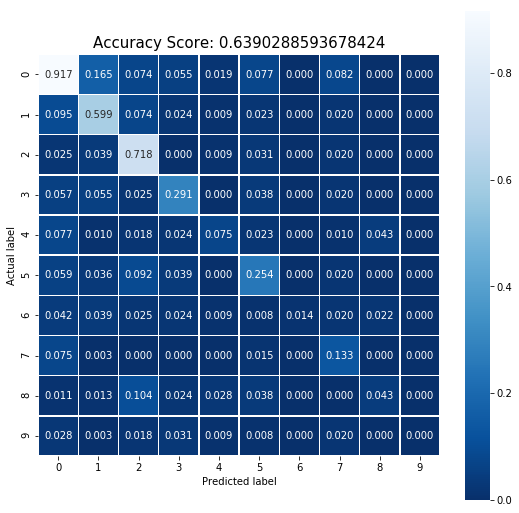

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi

              precision    recall  f1-score   support

           1       0.66      0.92      0.77      1089
           2       0.62      0.60      0.61       309
           3       0.63      0.72      0.67       163
           4       0.57      0.29      0.39       127
           5       0.47      0.07      0.13       107
           6       0.49      0.25      0.34       130
           7       1.00      0.01      0.03        71
           8       0.38      0.13      0.20        98
           9       0.40      0.04      0.08        46
          10       0.00      0.00      0.00        43

   micro avg       0.64      0.64      0.64      2183
   macro avg       0.52      0.30      0.32      2183
weighted avg       0.61      0.64      0.58      2183



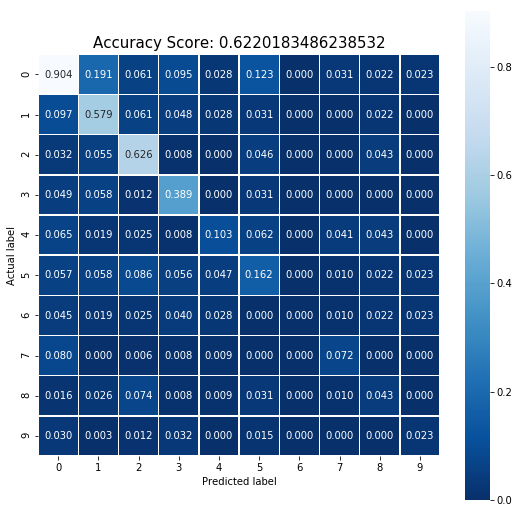

              precision    recall  f1-score   support

           1       0.66      0.90      0.76      1089
           2       0.57      0.58      0.58       309
           3       0.63      0.63      0.63       163
           4       0.56      0.39      0.46       126
           5       0.41      0.10      0.16       107
           6       0.32      0.16      0.22       130
           7       0.00      0.00      0.00        70
           8       0.41      0.07      0.12        97
           9       0.20      0.04      0.07        46
          10       0.25      0.02      0.04        43

   micro avg       0.62      0.62      0.62      2180
   macro avg       0.40      0.29      0.30      2180
weighted avg       0.56      0.62      0.56      2180



C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  

from sklearn.linear_model import LogisticRegression
import seaborn as sns

X = df_train_norm.values
y = df_train_label.values
y=y.reshape((y.shape[0],))
skf = StratifiedKFold(n_splits=2)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logisticRegr = LogisticRegression()
    logisticRegr.fit(X_train, y_train)
    y_pred = logisticRegr.predict(X_test)  
    cm = confusion_matrix(y_test, y_pred)
    cm = cm / cm.astype(np.float).sum(axis=1)
    score = logisticRegr.score(X_test,y_test)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15)
    plt.show()
    print(classification_report(y_test, y_pred)) 

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,shuffle=True)  
#print(X_train.shape)


## Regular test train split of data
The logistic regression of regular split 

              precision    recall  f1-score   support

           1       0.69      0.89      0.78       437
           2       0.63      0.63      0.63       115
           3       0.62      0.67      0.64        58
           4       0.59      0.47      0.52        47
           5       0.42      0.09      0.15        55
           6       0.36      0.32      0.34        50
           7       0.67      0.07      0.13        27
           8       0.33      0.14      0.19        44
           9       0.43      0.19      0.26        16
          10       0.25      0.04      0.07        24

   micro avg       0.64      0.64      0.64       873
   macro avg       0.50      0.35      0.37       873
weighted avg       0.60      0.64      0.59       873



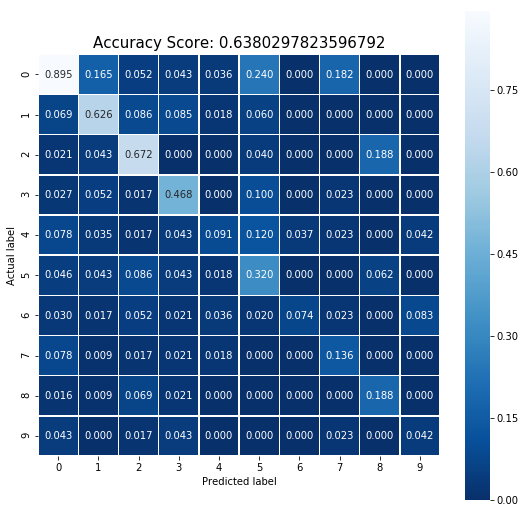

In [8]:
X = df_train_norm.values
y = df_train_label.values
y=y.reshape((y.shape[0],))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
logisticRegr = LogisticRegression(solver='newton-cg',multi_class='auto')
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)  
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.astype(np.float).sum(axis=1)
score = logisticRegr.score(X_test,y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
print(classification_report(y_test, y_pred)) 

## Trying a linear SVM
It seems better with linear rather than gaussian don't know why 

In [9]:
X = df_train_norm.values
y = df_train_label.values
y=y.reshape((y.shape[0],))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

0.6403207331042382
[[407  19   1   1   0   7   0   1   1   0]
 [ 34  70   5   4   0   2   0   0   0   0]
 [ 14   3  38   0   0   0   0   0   3   0]
 [ 18   5   1  21   0   2   0   0   0   0]
 [ 39   4   1   1   4   5   1   0   0   0]
 [ 27   5   2   2   1  11   0   0   2   0]
 [ 19   1   2   0   1   2   0   1   1   0]
 [ 38   1   1   0   0   0   0   4   0   0]
 [  7   1   3   0   0   1   0   0   4   0]
 [ 22   0   1   1   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           1       0.65      0.93      0.77       437
           2       0.64      0.61      0.62       115
           3       0.69      0.66      0.67        58
           4       0.70      0.45      0.55        47
           5       0.67      0.07      0.13        55
           6       0.37      0.22      0.27        50
           7       0.00      0.00      0.00        27
           8       0.67      0.09      0.16        44
           9       0.36      0.25      0.30        16
         

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


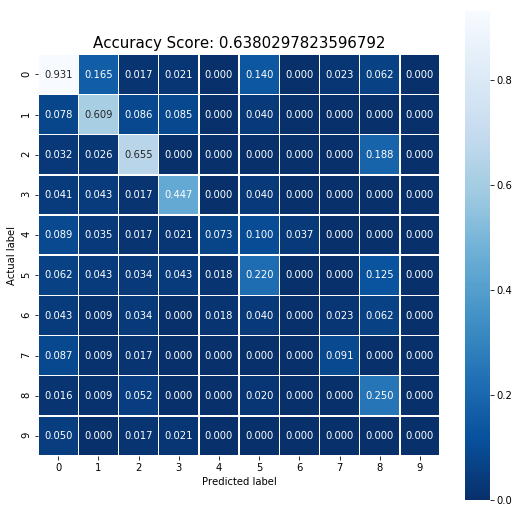

In [10]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = svclassifier.predict(X_test)  
print(svclassifier.score(X_test,y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))  

cm = cm / cm.astype(np.float).sum(axis=1)
score = logisticRegr.score(X_test,y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

Counter({1: 2178, 2: 618, 3: 326, 6: 260, 4: 253, 5: 214, 8: 195, 7: 141, 9: 92, 10: 86})
Counter({1: 2178, 5: 2178, 4: 2178, 2: 2178, 6: 2178, 10: 2178, 3: 2178, 7: 2178, 9: 2178, 8: 2178})
              precision    recall  f1-score   support

           1       0.54      0.48      0.51       458
           2       0.61      0.63      0.62       432
           3       0.70      0.76      0.73       435
           4       0.49      0.69      0.57       425
           5       0.47      0.37      0.42       439
           6       0.58      0.44      0.50       429
           7       0.40      0.29      0.33       465
           8       0.59      0.65      0.62       403
           9       0.68      0.79      0.73       463
          10       0.50      0.55      0.52       407

   micro avg       0.56      0.56      0.56      4356
   macro avg       0.56      0.56      0.56      4356
weighted avg       0.56      0.56      0.55      4356



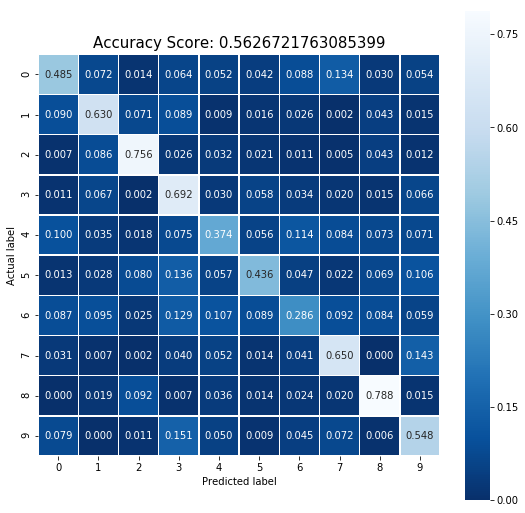

In [12]:
from collections import Counter
from sklearn.datasets import make_classification

X = df_train_norm.values
y = df_train_label.label.values


from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
print(Counter(y))
X_res, y_res = sm.fit_resample(X, y)
print(Counter(y_res))

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=0)
svclassifier = SVC(kernel='rbf',gamma='auto')  
svclassifier.fit(X_train, y_train)




svclassifier.fit(X_tres, y_tres)
y_pred = svclassifier.predict(X_test)  
score = svclassifier.score(X_test,y_test)


print(classification_report(y_test, y_pred)) 

cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.astype(np.float).sum(axis=1)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()




In [ ]:
from collections import Counter
from sklearn.datasets import make_classification

X = df_train_val.values
y = df_train_label.label.values


from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

print(Counter(y))
X_res, y_res = sm.fit_resample(X, y)
print(Counter(y_res))

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3, random_state=0)

logisticRegr = LogisticRegression(solver='saga',multi_class='auto',max_iter=5000)
logisticRegr.fit(X_train, y_train)


y_pred = logisticRegr.predict(X_test)  
score = logisticRegr.score(X_test,y_test)


print(classification_report(y_test, y_pred)) 

cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.astype(np.float).sum(axis=1)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()




In [ ]:
kaggle = pd.read_csv('test_data.csv',header=None)
kaggle.head()

In [ ]:
remove = np.array([0,1,2,3])
remove = np.array([remove+i*12 for i in range(4)])
remove = remove.flatten()
tmp=np.array(mfcc)[remove]
kaggle_clean = kaggle.drop(tmp,axis=1)
kaggle_clean.head()

In [ ]:
x = kaggle_clean.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
kaggle_norm = pd.DataFrame(x_scaled)

kaggle_norm.head()

In [ ]:
kaggle_pred = logisticRegr.predict(kaggle)
result = pd.DataFrame(data=kaggle_pred,columns=["Sample_label",])
result['Sample_id'] = result.index+1
output = pd.DataFrame()
output['Sample_id'] = result['Sample_id']
output['Sample_label'] = result['Sample_label']
output.to_csv('test',index=False)


In [ ]:
t1 = pd.read_csv('accuracy_solution_16_Oct_1')
t2 = pd.read_csv('test')

t2.Sample_label.value_counts()